# Usefull Python Commands Collection

### Print variables in string:

In [ ]:
num = 1
name = 'Emanuel'
print('My number is: {one}, and my name is: {two}'.format(one=num,two=name))

### Logical Operators:

In [ ]:
print((1 > 2) and (2 < 3))
print((1 > 2) or (2 < 3))
print((1 == 2) or (2 == 3) or (4 == 4))

The \'in\' command checks if an item is contained in a list and gives back a boolean value

In [ ]:
print('x' in [1,2,3])
print('x' in ['x','y','z'])

### For - loops / List comprehension (both do the same thing)

In [ ]:
x = [1,2,3,4]

In [ ]:
out = []
for item in x:
    out.append(item**2)
print(out)

In [ ]:
print([item**2 for item in x])

### Writing Functions as lambda expression

In [ ]:
def times2(var):
    return var*2
times2(2)

In [ ]:
t = lambda var: var*2
t(2)

### Using map and filter expressions


In [ ]:
seq = [1,2,3,4,5]

\'map\' using an earlier defined function (here times2). Map applies the defined function to every element in the list of seq

In [ ]:
list(map(times2,seq))

If you do not want to define a function first you can directly write the function with a lambda expression

In [ ]:
list(map(lambda var: var*2,seq))

The filter function allows you to filter elements from a list using a defined function that for example contains a logic expression. Usually its the easiest to use a lambda expression. For example we want to filter out all the numbers in seq that are multiples of 2. A function or lambda expression must always give back a boolean value which can be used to apply the filter.

In [ ]:
list(filter(lambda item: item%2 == 0,seq))

### Usefull string manipulation methods

In [ ]:
tweet = 'Go Sports! #Sports'

In [ ]:
tweet.upper() #get all upper case letters

In [ ]:
tweet.lower() #get all lower case letters

In [ ]:
tweet.split() #splits at the whitespace

In [ ]:
tweet.split('#') #splits at the defined symbol

### Usefull dictionary manipulations

In [1]:
d = {'key1':'value1','key2':'value2'}

In [ ]:
d['key']

In [ ]:
list(d.keys()) #return list of keys

In [ ]:
list(d.items()) #return list of key value tuples

In [ ]:
list(d.values()) #return list of dictionary values

## Numpy

### Reshape an array

In [ ]:
arr_2d = np.arange(0,50).reshape(5,10) #creates 1D array with 'arange' and then reshapes it to 2D
arr_2d

### Indexing into arrays - Broadcasting

In [ ]:
import numpy as np
arr = np.arange(0,11)
print(arr)
arr[0:5]=100 #broadcasts a new value to a range of the array
print(arr)

When we slice a numpy array and manipulate the slice it is still connected to the original array and the values will get changed in the original array. If you want a copy you have to specifically use the copy command.

In [ ]:
arr = np.arange(0,11)
print(arr)
slice_of_arr = arr[0:6] #get a slice
print(slice_of_arr)
slice_of_arr[:] = 100 #modify slice
print(slice_of_arr)
print(arr) #original got modified

In [ ]:
arr = np.arange(0,11)
arr_copy = arr.copy() #make a copy
print(arr_copy)
arr_copy[1:6] = 200 #modify the copy
print(arr_copy) 
print(arr) #original is untouched

### Boolean Indexing

In [ ]:
arr = np.arange(1,11)
print(arr)
print(arr>4) #this notation creates a boolean array
new_arr = arr[arr>4] #using both together makes the new array choose only the true elements of the boolean array
#this notation actually creates a new array from the old one (see above)
print(new_arr)


### Universal Array Functions

The documentation of the universal array functions can be found here: https://docs.scipy.org/doc/numpy/reference/ufuncs.html

In [ ]:
arr = np.arange(0,10)
arr + arr
arr/arr
np.log(arr)

## Pandas

In [5]:
import pandas as pd
import numpy as np
from numpy.random import randn

### DataFrames

A data frame is created by passing the data, then the index, which are the row labels and then the column labels. Of course the amount of data should add up (a 5x4 matrix needs 5 indices and 4 column names). If a single value is passed as data, it is copied into all the cells.
In this case randn is a function from numpy.random

In [4]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

NameError: name 'pd' is not defined

#### Data Exploration

In [ ]:
df.dtypes #gives datatype of each column
df.head() #gives head of dataframe
df.info()
df.describe()

#### Selection and Indexing into a Pandas data frame

In [ ]:
df['W'] #selects a single column

In [ ]:
df[['W','Z']] #select multiple columns

In [ ]:
df['new'] = df['W'] + df['Y'] #create new column, also possible to add series 
                              #object with the right dimensions and labels

In [ ]:
df.drop('new',axis=1,inplace=True)  #remove a column. the axis label is necessary 
                                    #to access the column axis(1) row axis(0)
                                    #The inplace is necesary to make the change permanent

In [ ]:
df.loc['A'] #access a row

In [ ]:
df.loc['B','Y'] #access a single cell

In [ ]:
df.iloc[0,0] #access a single cell or with only one number a row

In [ ]:
df.iloc[[0,1,2],[0,1]] #select a subselection of the dataframe (results in 3x2 matrix)

#### Conditional Selection (similar to numpy)

In [ ]:
df[df['W']>0][['Y','X']] #selects the columns Y and X from the dataframe where all rows
                         #are dropped for which the values in column W are smaller than zero

Above code is split up in the following for better understanding:

In [ ]:
boolser = df['W']>0 #get boolean dataseries for column W

In [ ]:
new_df = df[boolser] #select the rows of the original dataframe according to boolean series

In [ ]:
new_df[['Y','X']] #select the columns we want to select

For two conditions you can use | (or) and & (and) operators. The normal and/or operators only work for single boolean values not a series. Be carefull to put parenthesis around the selected series df\['W'\]>0

In [ ]:
df[(df['W']>0) & (df['Y'] > 1)]

#### Indexing (misc.)

In [ ]:
df.reset_index() #resets index to numerical index and creates a new column with old index

In [ ]:
newind = 'CA NY WY OR CO'.split()
df['States'] = newind    # create column containing the new index
df.set_index('States')  #set column as new index, to make permanent add 'inplace =True'

#### Indexing in multi-level data frames

In [1]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
#Data Frame
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])

NameError: name 'pd' is not defined

The first loc row access selects everything that has the index G1, therefore returning a data frame. The next loc command selects then the row of this dataframe with the index 1

In [ ]:
df.loc['G1'].loc[1]

If we want to choose all the rows with the index 1 doing this with the loc command is quite complicated. Therefore we use the cross-section command.

In [ ]:
df.xs(1,level='Num')

### Missing Data

In [ ]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

In [3]:
df.dropna() #drops all rows with a null value
df.dropna(axis=1) #drops all the columns with a null value
df.dropna(thresh = 2) #requires a threshold of two missing values before a row gets dropped

NameError: name 'df' is not defined

The fillna value fills all missing values with whatever we define as a filling value, for example the mean over the whole set

In [ ]:
df['A'].fillna(value=df['A'].mean()) #fills missing values with the 

### Group data

In [ ]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df

In [ ]:
by_comp = df.groupby("Company")  #creates new object grouped by company

In [4]:
by_comp.mean() # on this object several functions can be applied like sum(), count() etc.
               # a usefull function showing all the results is describe()
#if we want to change how the results are displayed, we can transpose them
#by_comp.mean().transpose

NameError: name 'by_comp' is not defined

In [5]:
by_comp.describe().transpose()['GOOG'] #Of course these actions can all put together in one line

NameError: name 'by_comp' is not defined

### Join, merge and concatenate

Concat automatically concatenates along the rows. Make sure the row indexing lines up nicely. If you want to concatenate along the columns you need to specify the axis=1

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])
pd.concat([df1,df2,df3])


For merging you always need to specify a column as a key along which the two datasets will be merged

In [6]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})  
pd.merge(left,right,how='inner',on='key')

NameError: name 'pd' is not defined

The join function always joins another dataset to a current dataset

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])
left.join(right)

### Operations

In [ ]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df

In [ ]:
df['col2'.unique() #prints an array of all the unique values in a column (like set)
df['col2'].nunique() #prints the number of unique values in column
df['col2'].value_counts() #returns a series where the index is all unique values and the data is how often they occur
df.sort_values(by='col2') #sorts values (index stays how it was)
df.isnull() #returns a data frame where all NaN are True

The apply funciton allows you to use either defined functions or lambda expressions that are then applied to every element in the selection. To make it permanent use inplace = True

In [ ]:
df['col2'].apply(lambda x:x*x) #or just pass the name of a function

The pivot table function can produce hirarchical indices

In [6]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)

In [1]:
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

NameError: name 'df' is not defined

Select all the strings of a dataframe containing a certain string( match, search, find)

In [8]:
import re
df[df['A'].apply(lambda x:bool(re.search('foo',x)))]

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2


### Input/Output

In [ ]:
df = pd.read_csv('example')
df.to_csv('example',index=False)

In order to read from html tables you need to install the following: lxml html5lib BeautifulSoup4

In [ ]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

This returns a list with everything pandas finds. The pandas data frame usually is at the list index zero

In [13]:
df[0]

NameError: name 'df' is not defined

#### Simple visualization 
There are several plot types built-in to pandas, most of them statistical plots by nature:

    df.plot.area
    df.plot.barh
    df.plot.density
    df.plot.hist
    df.plot.line
    df.plot.scatter
    df.plot.bar
    df.plot.box
    df.plot.hexbin
    df.plot.kde
    df.plot.pie


In [16]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

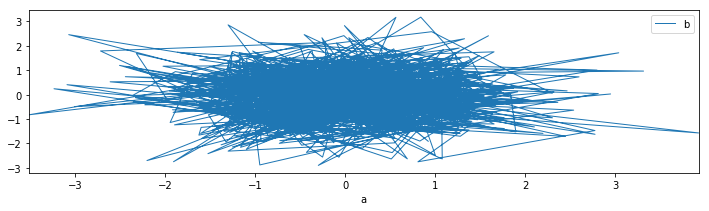

In [21]:
df['a'].plot.hist(bins = 20)
df.plot.line(x='a',y='b',figsize=(12,3),lw=1) #usefull for timeseries data etc.

## Matplotlib

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

Object oriented creation of Matplotlib figures:

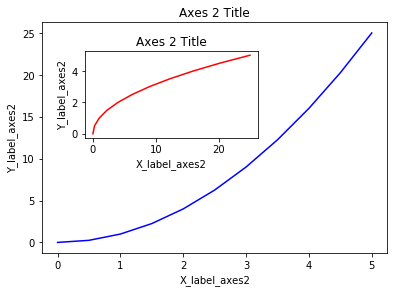

In [3]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes [x(lower left corner) y(lower left corner) width height]
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

In [ ]:
fig.savefig("filename.png")

## Seaborn

In [4]:
import seaborn as sns
tips = sns.load_dataset('tips')


In [ ]:
#kde is kernel density estimation, ideal to look at the distribution of one dimension (columng of data)
sns.distplot(tips['total_bill'],kde=False,bins=30) 

In [ ]:
#ideal for looking at the correlation of two data columns to each other
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter') #kind: hex, reg etc.

In [1]:
#essentially does pairwise correlation for the whole dataset. Hue allows for differentiating
#categorical variables
sns.pairplot(tips,hue='sex',palette='coolwarm')

NameError: name 'sns' is not defined

#### Categorical Plots

/home/buchholz/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


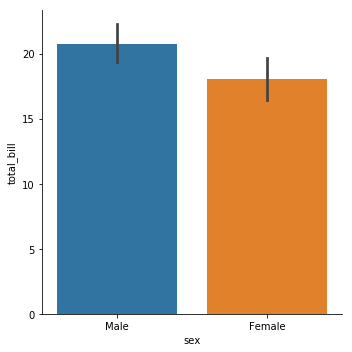

In [5]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar') #with kind the type of plot is defined
#bar: simple barplot
#box: boxplot with whiskers where every sections denotes a 25 percentile, 
        # all dots are outliers
#violinp: improvement over the boxplot by showing the distribution along the box
#            with hue='sex',split=True where hue is the differentiation for a categorical
#            variable the distribution of both categorical variables can be compared across 
#            whole box
#strip: plots all datapoints allong a line. With jitter=True points that would land 
#           on top of each other are distributed to the sides
#swarm: mix of violinplot and stripplot
############################################
#all plots can also individually called like
#sns.boxplot(x='sex',y='total_bill',data = tips)

#### Matrix Plots

In [8]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')

We need to get the data in matrix form. Depending on our data we can either use the correlation between our columns or rearrange the data into matrix form

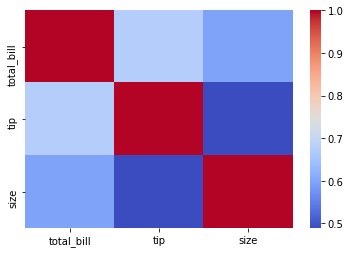

In [11]:
corr = tips.corr()
sns.heatmap(corr,cmap = 'coolwarm')

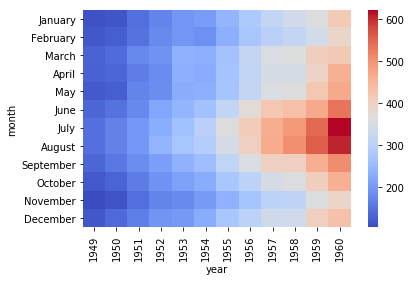

In [10]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights,cmap = 'coolwarm')

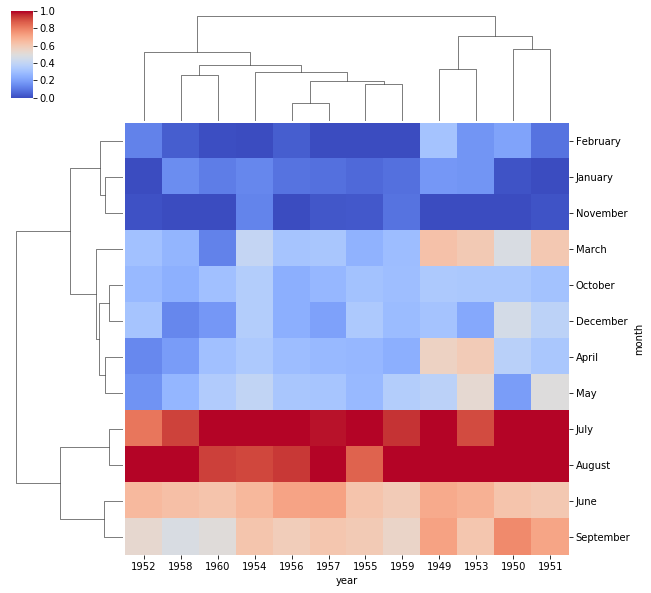

In [12]:
#For Clustering use Clustermap: Notice the Years and Months get clustered together
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

In [ ]:
#simple regression plot
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

##### Color and Styling

In [ ]:
sns.countplot(x='sex',data=tips)
#Set style
sns.set_style('ticks')
#Remove lines around the plot
sns.despine(left=True)
#Set the size of the figure with matplotlib
plt.figure(figsize=(12,3)) #w,h tuple in inches (1 inch usually 60px (60dpi))
#Set the context (e.g for presentation etc.)
sns.set_context('poster',font_scale=4)
sns.countplot(x='sex',data=tips,palette='coolwarm')
#For palette information google matplotlib colormaps